In [ ]:
from python_workflow_definition.aiida import write_workflow_json
from python_workflow_definition.pyiron_base import load_workflow_json
from pyiron_base import Project

from aiida import load_profile
load_profile()

workflow_json_filename =  "aiida_to_pyiron_base_qe.json"

In [2]:
from quantum_espresso_workflow import generate_structures as _generate_structures
from quantum_espresso_workflow import get_bulk_structure as _get_bulk_structure
from quantum_espresso_workflow import calculate_qe as _calculate_qe
from quantum_espresso_workflow import plot_energy_volume_curve as _plot_energy_volume_curve

from python_workflow_definition.aiida import construct_wg_qe

# from python_workflow_definition.pyiron_base import  get_dict
from aiida_workgraph import task
from typing import Any

load_profile()

get_bulk_structure = task.pythonjob()(_get_bulk_structure)
generate_structures = task.pythonjob()(_generate_structures)
calculate_qe = task.pythonjob(outputs=["energy", "volume", "structure"])(
    _calculate_qe
)
plot_energy_volume_curve = task.pythonjob()(_plot_energy_volume_curve)

strain_lst = [0.9, 0.95, 1.0, 1.05, 1.1]

wg = construct_wg_qe(
    get_bulk_structure=get_bulk_structure,
    calculate_qe=calculate_qe,
    generate_structures=generate_structures,
    plot_energy_volume_curve=plot_energy_volume_curve,
    strain_lst=strain_lst
)

wg

NodeGraphWidget(settings={'minimap': True}, style={'width': '90%', 'height': '600px'}, value={'name': 'wg-qe',…

In [3]:
_ = write_workflow_json(wg=wg, file_name=workflow_json_filename)


In [4]:

pr = Project("test")
pr.remove_jobs(recursive=True, silently=True)


delayed_object = load_workflow_json(project=pr, file_name=workflow_json_filename)


  0%|          | 0/2 [00:00<?, ?it/s]

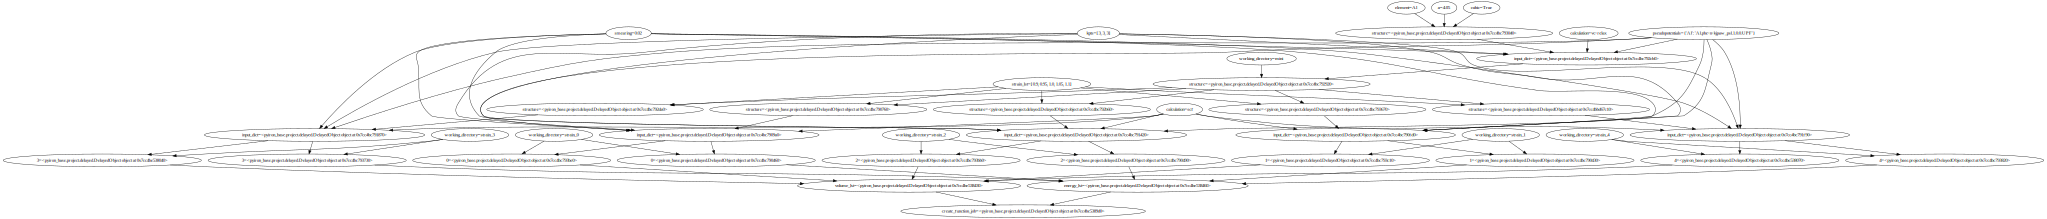

In [5]:
delayed_object.draw()


The job get_bulk_structure_f1e730ed97e30e5439e855d2ac41396f was saved and received the ID: 2
The job get_dict_a4e1059db50fba623944ef531887b217 was saved and received the ID: 3
The job calculate_qe_3714595ac9b6df316494ea060cfc74ef was saved and received the ID: 4
FROM ASE
Atoms(symbols='Al4', pbc=True, cell=[4.05, 4.05, 4.05])
['Al', 'Al', 'Al', 'Al']
{'Al': 'Al.pbe-n-kjpaw_psl.1.0.0.UPF'}
The job generate_structures_3774e309f406c5fe64423f3e8686a920 was saved and received the ID: 5
The job get_dict_096775f9846855cac32157b2309bd198 was saved and received the ID: 6
The job calculate_qe_c47675a4a62f231828be15b62023914a was saved and received the ID: 7
FROM ASE
Atoms(symbols='Al4', pbc=True, cell=[3.906019955258453, 3.906019955258453, 3.906019955258453])
['Al', 'Al', 'Al', 'Al']
{'Al': 'Al.pbe-n-kjpaw_psl.1.0.0.UPF'}
The job get_dict_bf59a6263e6cc812b6fd356cda01aa98 was saved and received the ID: 8
The job calculate_qe_d03f41eac4f8130a3dcf6c2dfb742bd3 was saved and received the ID: 9
FROM A

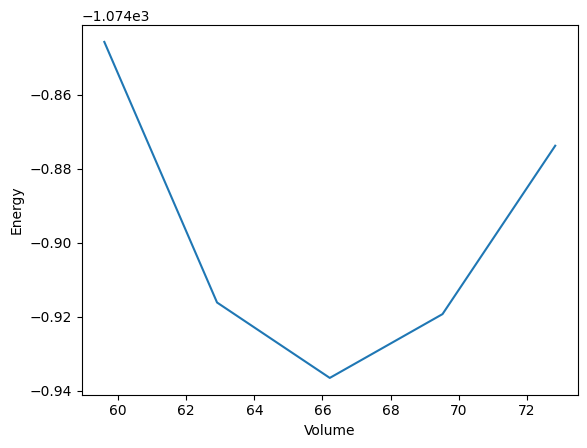

In [6]:

delayed_object.pull()
